Two Classes Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static knn as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  0.7617261188242493
Average MCC:  0.102193192195
Average error: 45.9611
Average macro-F1: 0.39544878822577983
Average micro-F1: 0.5364
Average Accuracy:  54.0389
Standard Deviation:  9.96931180122
Variance:  99.38717779


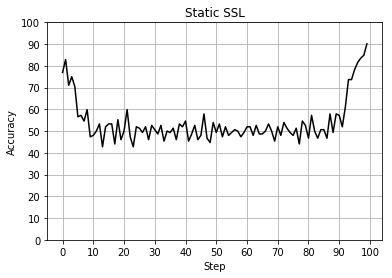

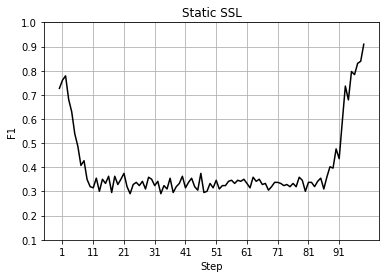

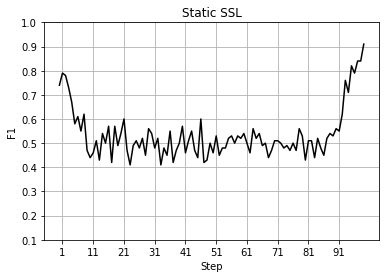




METHOD: Sliding knn as classifier
Execution time:  0.10533447690489806
Average MCC:  0.0381128821923
Average error: 48.4412
Average macro-F1: 0.356029587836116
Average micro-F1: 0.5118999999999999
Average Accuracy:  51.5588
Standard Deviation:  6.81811370982
Variance:  46.48667456


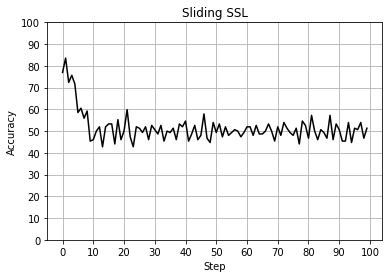

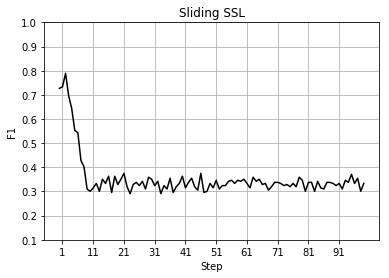

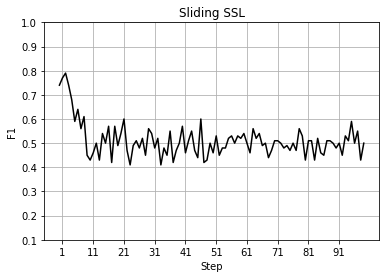




METHOD: Incremental knn as classifier
Execution time:  3.6338055767681676
Average MCC:  0.0991740439613
Average error: 46.0068
Average macro-F1: 0.3942377280028297
Average micro-F1: 0.5357000000000001
Average Accuracy:  53.9932
Standard Deviation:  9.96857872317
Variance:  99.37256176


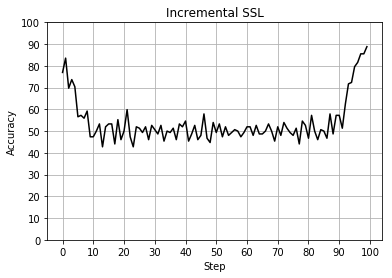

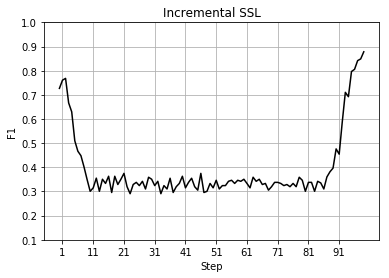

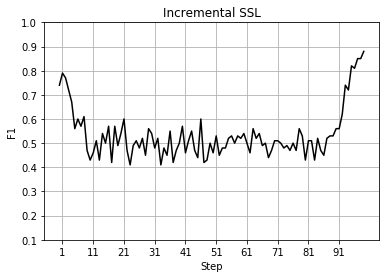




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  0.3975208306090545
Average MCC:  0.729787837528
Average error: 14.3818
Average macro-F1: 0.8526821459172652
Average micro-F1: 0.8565999999999999
Average Accuracy:  85.6182
Standard Deviation:  5.06883031478
Variance:  25.69304076


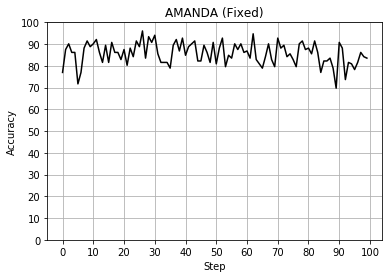

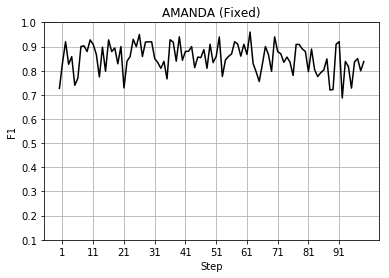

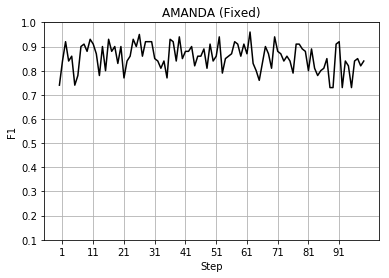




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.3434870741779461
Average MCC:  0.41489292038
Average error: 30.4805
Average macro-F1: 0.6245855013764996
Average micro-F1: 0.6964
Average Accuracy:  69.5195
Standard Deviation:  16.9147782353
Variance:  286.10972275


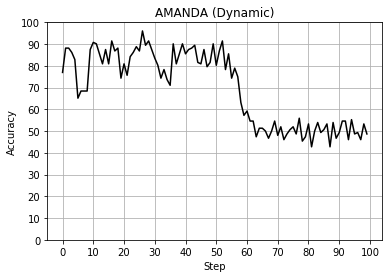

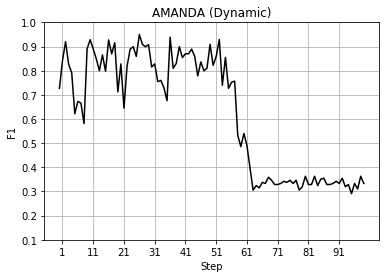

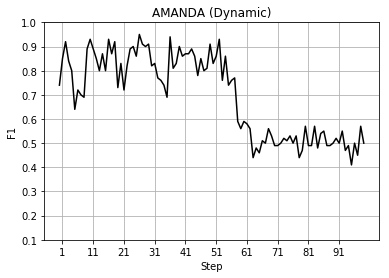




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  17.321354144650215
Average MCC:  0.310842007534
Average error: 35.6251
Average macro-F1: 0.5677660602611438
Average micro-F1: 0.6435000000000001
Average Accuracy:  64.3749
Standard Deviation:  14.6840789629
Variance:  215.62217499


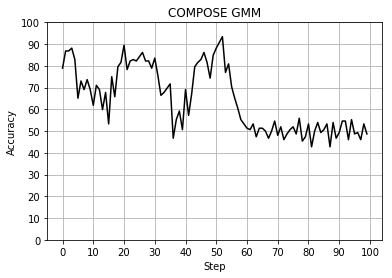

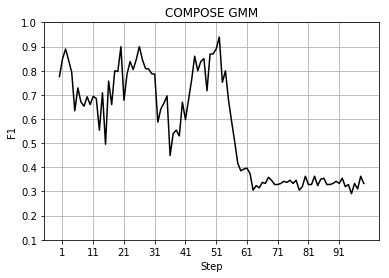

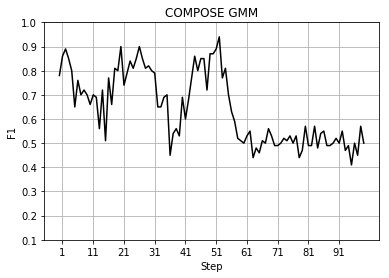




Method: Level IW
Execution time:  17.321354144650215
Average MCC:  -0.0180488519662
Average macro-F1: 0.475810639754262
Average micro-F1: 0.49310000000000004
Average Accuracy:  52.598682
Standard Deviation:  13.2455600644
Variance:  175.44486142


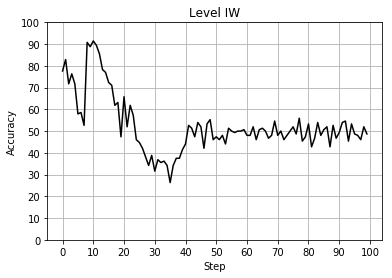

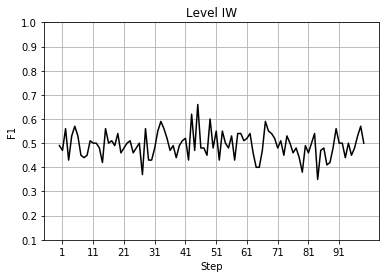

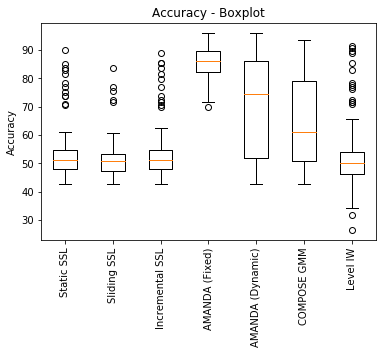

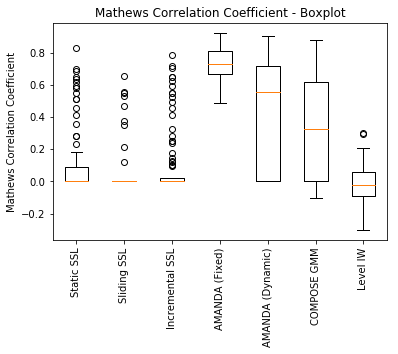

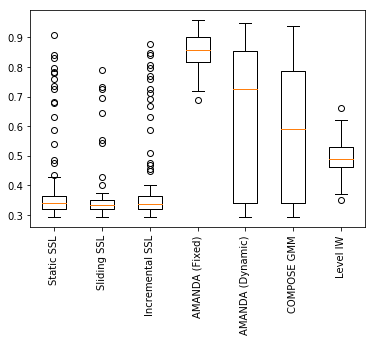

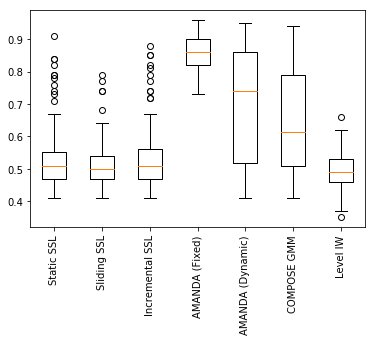

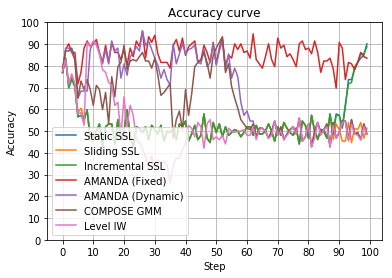

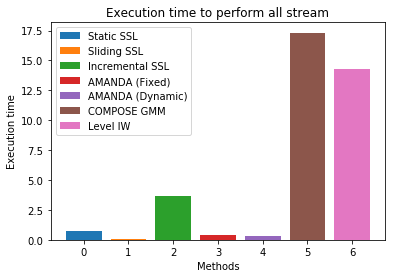

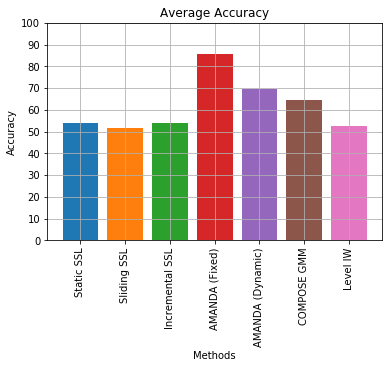

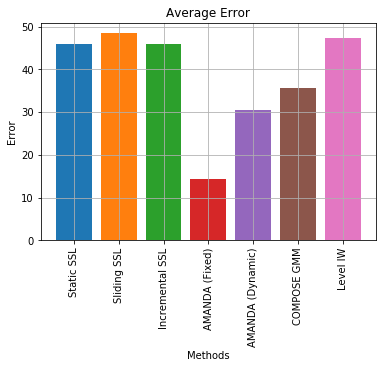

Error reduction: -4.58947165838
Error reduction: -0.0845687088375
Error reduction: 58.438088118
Error reduction: 28.647141226
Error reduction: 19.1269622439
Error reduction: -2.66515047494


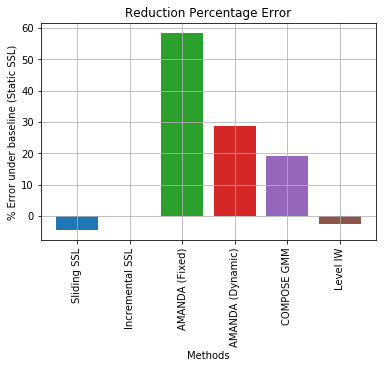

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load2CHT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 12, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 12, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 12, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 12, 0.9, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 10, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 2)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '2CHT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()